Import library




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

Make dataset


In [ ]:
X ,y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(80, 1) (20, 1) (80,) (20,)


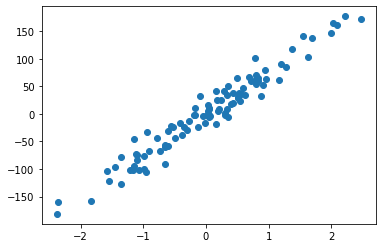

In [ ]:
plt.scatter(X,y)
plt.show()

## Các cách triển khai thuật toán

Cách 1 : Gradient Descent

In [ ]:
class LinearRegression() :     
    def __init__( self, learning_rate, iterations ) :         
        self.learning_rate = learning_rate         
        self.iterations = iterations
    def fit( self, X, Y ) :         
        self.m, self.n = X.shape         
        self.W = np.zeros( self.n )        
        self.b = 0  
        self.X = X  
        self.Y = Y
        for i in range( self.iterations ):          
            Y_pred = np.dot(X,self.W ) + self.b
            
            dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m
            db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
      
            self.W = self.W - self.learning_rate * dW    
            self.b = self.b - self.learning_rate * db    
    def predict(self, X):
        y_predict = np.dot(X, self.W) + self.b
        return y_predict




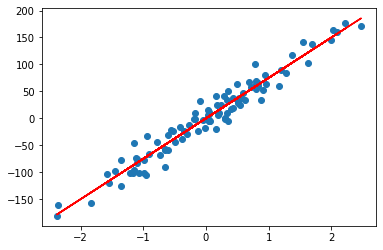

time:  2.6312718391418457
MSE:  305.7741316228637


In [ ]:
start = time.time()
Linear = LinearRegression(0.01,100000)
Linear.fit(X_train,y_train)
y_pred_line = Linear.predict(X)
y_pred = Linear.predict(X_test)
end = time.time()
plt.plot(X,y_pred_line,color='red', label ='Predict')
plt.scatter(X,y)
plt.show()
print("time: ",end-start)
print("MSE: ",mean_squared_error(y_test,y_pred))

Cách 2 : Normal Equation


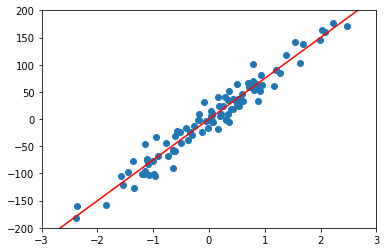

time:  0.0010387897491455078
MSE:  305.77413162286433


In [ ]:
start = time.time()
one = np.ones((X_train.shape[0],1))
Xbar = np.concatenate((one,X_train),axis =1)
A = np.dot(Xbar.T,Xbar)
b = np.dot(Xbar.T,y_train)
w = np.dot(np.linalg.pinv(A),b)
w0=w[0]
w1=w[1]
x0 = np.linspace(-3, 3, 3)
y0= w0 + w1*x0
y_pred = w0 + w1*X_test
end = time.time()
plt.scatter(X,y)
plt.plot(x0,y0,color='red')
plt.axis([-3,3,-200,200])
plt.show()
print("time: ",end-start)
print("MSE: ",mean_squared_error(y_test,y_pred))

Cách 3 : Sklearn model


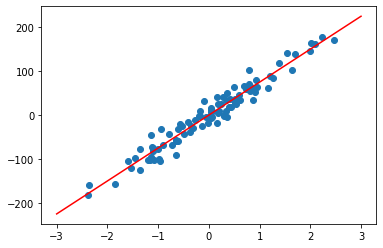

time:  0.0009779930114746094
MSE:  305.7741316228642


In [ ]:
start = time.time()
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
end = time.time()
x0 = np.linspace(-3, 3, 3)
b = model.intercept_
w = model.coef_
y0= b + w*x0
plt.plot(x0,y0,color = 'red')
plt.scatter(X,y)
plt.show()
print("time: ",end-start)
print("MSE: ",mean_squared_error(y_test,y_pred))

## Feature Scalling 



In [ ]:
Xtrain = np.array([[260000,300000,320000,360000,400000,570000,610000,630000],[1,1,1,2,2,2,3,3]]).T
Ytrain = np.array([550000,565000,610000,680000,725000,750000,800000,850000])

Không sử dụng StandardScaler



In [ ]:
start = time.time()
model = linear_model.LinearRegression()
model.fit(Xtrain,Ytrain)
end = time.time()
print(end-start)

0.0008709430694580078


Có sử dụng StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(Xtrain)
X_scaler = scaler.transform(Xtrain)
start = time.time()
model = linear_model.LinearRegression()
model.fit(X_scaler,Ytrain)
end = time.time()
print(end-start)

0.0011327266693115234


##Poly Regression

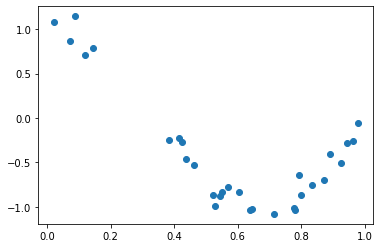

In [ ]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)
np.random.seed(0)
n_samples = 30
degrees = [1, 4, 15]
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
plt.scatter(X,y)

(-1.0, 1.0)

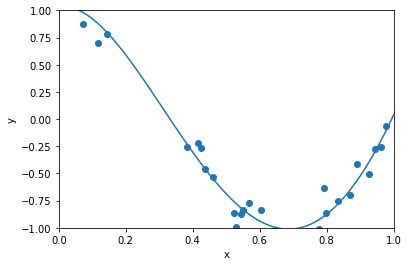

In [ ]:
polynomial_features = PolynomialFeatures(degree=4, include_bias=False)
linear_regression = linear_model.LinearRegression()
pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
pipeline.fit(X[:, np.newaxis], y)
X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]))
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1, 1))

##Underfitting và Overfitting

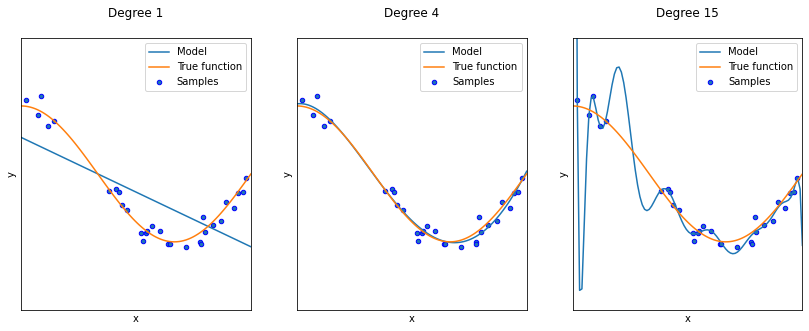

In [ ]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = linear_model.LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\n".format(
            degrees[i]
        )
    )
plt.show()